In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import pearsonr, spearmanr, kendalltau
from pathlib import Path


In [61]:
fig_width = 6.3  
fig_height = 3.54  
#plt.rcParams['figure.figsize'] = (fig_width, fig_height) # установка размеров для всех графиков
warnings.simplefilter(action='ignore', category=FutureWarning) #отключение предупреждений так как требуется легенда

Фильтрация данных для таблицы

In [63]:
file_path = "D:/AI/Computerized-campimetry-test-analysis/summary_per_color_group.xlsx"
data_t = pd.read_excel(file_path)
test_data = data_t.rename(columns=lambda x: x.replace('T258', 'CM')) #замена названий столбцов
test_data

,Unnamed: 0,CM_dH+_red_mean,CM_dH+_red_std,CM_dH+_red_min,CM_dH+_red_25%,CM_dH+_red_50%,CM_dH+_red_75%,CM_dH+_red_max,CM_dH-_red_mean,CM_dH-_red_std,...,T278_SMR_diff_25%,T278_SMR_diff_50%,T278_SMR_diff_75%,T278_SMR_diff_max,T278_SMR_corr,T278_SMR_tau,id_test_attempt,id_sample,age,sex
0,61005,2.75,1.500000,1,1.75,3.0,4.00,4,1.00,0.816497,...,-0.111650,-0.003722,0.110599,0.298893,-0.348606,-0.231483,0,0,20.010959,1
1,47000,2.25,0.957427,1,1.75,2.5,3.00,3,0.75,0.500000,...,-0.051903,0.048618,0.063985,0.219723,0.102884,0.066421,0,1,20.013699,0
2,47466,1.75,0.957427,1,1.00,1.5,2.25,3,0.50,0.577350,...,-0.064603,-0.051664,0.073810,0.274372,-0.202019,-0.016667,0,2,20.112329,0
3,59980,2.00,0.816497,1,1.75,2.0,2.25,3,0.75,0.500000,...,-0.055315,-0.027076,0.070588,0.181467,0.019172,-0.049460,0,3,20.158904,0
4,47927,2.00,0.816497,1,1.75,2.0,2.25,3,0.25,0.500000,...,-0.129545,0.003198,0.072435,0.324830,-0.149060,-0.191063,1,4,20.158904,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,54377,6.75,2.629956,3,6.00,7.5,8.25,9,10.00,0.000000,...,-0.168182,-0.004284,0.123874,0.438725,0.357924,0.218462,0,2811,82.610959,1
2999,54127,7.25,3.304038,3,6.00,7.5,8.75,11,5.50,2.380476,...,-0.075099,-0.000922,0.052347,0.393750,-0.397136,-0.306667,0,2812,83.375342,0
3000,54142,10.25,6.184658,3,7.50,10.0,12.75,18,7.25,1.892969,...,-0.103839,0.003205,0.131783,0.408466,-0.188465,-0.295840,0,2813,83.471233,0
3001,51135,13.00,4.966555,7,10.75,13.0,15.25,19,3.25,2.753785,...,-0.103728,-0.051200,0.083958,0.212740,-0.194597,-0.159420,0,2814,83.567123,1


Фильтрация данных для графиков

In [65]:
file_path = "D:/AI/Computerized-campimetry-test-analysis/data_for_analysis.csv"  
data = pd.read_csv(file_path, sep=',')
#data = data[data["id_test_attempt"]>0]
data


,CM_dH+_yellow_green_50%,CM_dH+_blue_50%,CM_dH+_purple_50%,CM_dH+_red_50%,id_test_attempt
0,4.0,1.0,2.0,3.0,0
1,4.0,1.0,2.0,2.5,0
2,2.0,1.0,1.0,1.5,0
3,4.0,1.0,3.0,2.0,0
4,3.0,2.0,2.0,2.0,1
...,...,...,...,...,...
2998,4.0,3.0,6.0,7.5,0
2999,9.0,4.0,6.0,7.5,0
3000,5.0,3.0,9.0,10.0,0
3001,28.0,8.0,9.0,13.0,0


## Построение графиков boxplot

Boxplot это графический способ представления распределения данных, который позволяет визуально оценить ключевые статистические характеристики набора данных. Он особенно полезен для выявления выбросов, асимметрии и сравнения распределений между различными группами данных. Коробка охватывает центральные 50% наблюдений, показывая разброс между первым и третьим квартилями (Q1 и Q3). Внутри коробки расположена медиана, которая делит данные на две равные части. Усы, идущие от коробки, показывают нормальный диапазон данных, а точки за пределами усов считаются выбросами

In [68]:
def build_boxplots(data):
    test_data = data.drop("id_test_attempt", axis=1)
    fig, axes = plt.subplots(nrows=1, ncols=len(test_data.columns), figsize=(5 * len(test_data.columns), 6))
    
    for i, col in enumerate(test_data.columns):
        
        sns.boxplot(x="id_test_attempt", y=col, ax=axes[i], data=data, palette="Set1", width=0.65)
        axes[i].set_xlabel('Номер попытки', fontsize=17, fontweight='light')
        col = col.replace('_', ' ') #изменение названий параметра для графика
        if (col == "CM dH+ yellow green 50%"):
                col = "CM dH+ yellow-green 50%"
        axes[i].set_ylabel(col, fontsize=17, fontweight='light')

        axes[i].tick_params(axis='x', labelsize=15)
        axes[i].tick_params(axis='y', labelsize=15)


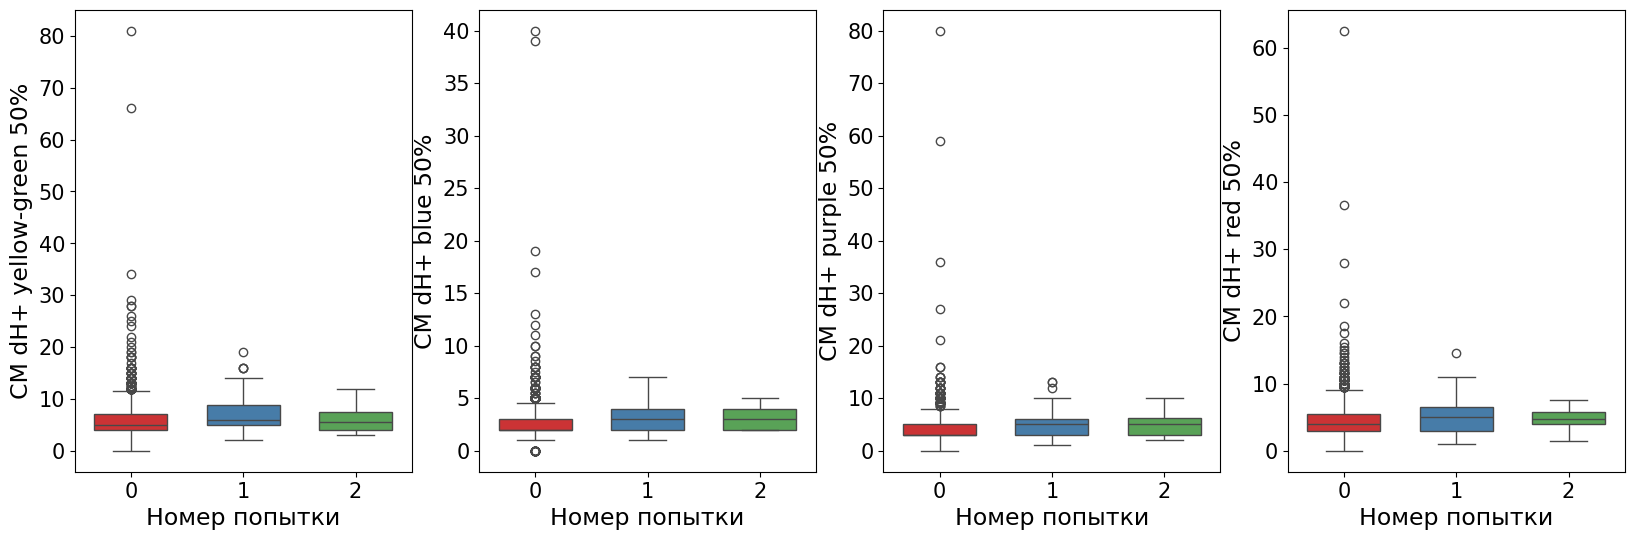

In [69]:
build_boxplots(data)

# Таблица с корреляциями


In [122]:
def calculate_correlations (data, data_col, particular_column, save_param = 0.5, save_tab = False, export_dir = None): 
                                                                                                                    #на 2 месте список нужных колонок
                                                                                                                    # на предпоследнем минимальный коэф
                                                                                                                    # для сохранения во 2 таблицу
    
    if export_dir is not None:
        export_dir = Path(export_dir)
        export_dir.mkdir(parents=True, exist_ok=True) #Создаёт папку по данному пути, первое создаёт все родительские папки,
                                                      #второе не вызовет ошибку если они уже есть
    # Задаем столбцы для итоговой таблицы
    columns = ['Показатель', 'Корреляция Спирмана', 'Pearson p-value','Статичтическая значимость', 
               'Корреляция Пирсона', 'Spearman p-value', 
               'Корреляция Кендалла', 'Kendall p-value']

    # Преобразование столбца particular_column в числовой формат
    data[particular_column] = pd.to_numeric(data[particular_column])
    
    # Создание пустой таблицы
    result_table = pd.DataFrame(columns=columns)
    high_corr_table = pd.DataFrame(columns=columns)
    
    for i,col in enumerate(data_col):
       
        # Вычисление корреляций и ошибки
        Pearson, Pear_p = pearsonr(data[particular_column], data[col])
        Spearman, Spear_p = spearmanr(data[particular_column], data[col])
        Kendall, Ken_p = kendalltau(data[particular_column], data[col])
        
        if Spear_p<0.05:
            importance = "Присутствует"
        else:
            importance = "Отсутствует"

        # Добавление строки с результатами в таблицу
        result_table.loc[i] = [
            data.columns[i],
            Spearman,
            Spear_p,
            importance,
            Pearson,
            Pear_p,
            Kendall,
            Ken_p
        ]

        if (Spearman >= save_param and importance == "Присутствует"):
            
            high_corr_table.loc[i] = [
            data.columns[i],
            Spearman,
            Spear_p,
            importance,
            Pearson,
            Pear_p,
            Kendall,
            Ken_p
        ]
            
            
    
    # Сортировка таблицы по корреляции Пирсона
    result_table_sorted = result_table.sort_values(by='Корреляция Спирмана', key=abs, ascending=False) #ascending false это сортировка 
                                                                                             #по убыванию, key это сохранение по модулю

    result_table_sorted = result_table_sorted.reset_index(drop=True) #создание новых индекс по порядку, если drop=false
                                                                     # то 2 столбца с новыми и старыми индексами   
    high_corr_table_sorted = high_corr_table.sort_values(by='Корреляция Спирмана', key=abs, ascending=False) 
    high_corr_table_sorted = high_corr_table_sorted.reset_index(drop=True) 

    if save_tab:
        # Сохранение результатов в Excel pandas
        result_table_sorted.to_excel(export_dir / "correlation_table.xlsx", index=False)
        high_corr_table_sorted.to_excel(export_dir / "high_correlation_table.xlsx", index=False)
    # Настройка ширины таблицы и вывод на экран
    pd.set_option('display.width', 130)

    return result_table_sorted, high_corr_table_sorted

Фильтрация только нужных колонок


In [105]:
drop_col = ["id_test_attempt", "age", "sex", "id_sample"]
data_col = test_data.columns.tolist()
data_col = data_col[1:]
for col in drop_col:
    data_col.remove(col)
export_dir = "../data_comp-camp/Tables"


Нулевая гипотеза это отсутствие корреляции, поэтому если p-value(уровень значимости) меньше чем 0.05, то нулевая гипотеза отклоняется и корреляция статистически значима

In [127]:
calculate_correlations(test_data, data_col, "age", save_tab=True, export_dir=export_dir)

(                        Показатель  Корреляция Спирмана  Pearson p-value Статичтическая значимость  Корреляция Пирсона  \
 0            Tstroop_color_SMR_min             0.650687     0.000000e+00              Присутствует            0.601885   
 1            Tstroop_color_SMR_25%             0.646653     0.000000e+00              Присутствует            0.585804   
 2        Tstroop_trueColor_SMR_min             0.640979     0.000000e+00              Присутствует            0.617522   
 3             Tstroop_mono_SMR_min             0.631738     0.000000e+00              Присутствует            0.567546   
 4             Tstroop_mono_SMR_25%             0.622701    4.446591e-322              Присутствует            0.533777   
 ..                             ...                  ...              ...                       ...                 ...   
 352  Tstroop_trueText_SMR_diff_25%             0.002724     8.814023e-01               Отсутствует            0.012020   
 353            